<h1 style="color:#1a96f6;"> <center> <b>

MIT License

Copyright (c) 2023 Felipe Braz da Silva

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
Projeto Final- Softex
</b> </center> </h1>

<div class="alert alert-info">
    
<h1 style="color:#1a96f6;"> <center> <b>
Projeto Final- Softex
</b> </center> </h1>
    
<h3 style="color:#1a96f6;"> <center> <b>
Machine Learning
</b></center> </h3>
    
<h3 style="color:#1a96f6;"> <center> <b>
Prof. Dr Tiago Moura
</b></center> </h3>

<h3 style="color:#1a96f6;"> <center> <b>
Discente: Felipe Braz da Silva
</b></center> </h3>

<h3 style="color:#1a96f6;"> <center> <b>
Data: 16/11/2023
</b></center> </h3>


</div>

###Informações do Dataset


 **Conjunto de dados de câncer de mama Wisconsin (diagnóstico)**

 **Objetivo**: A partir das características calculadas a partir de uma imagem digitalizada de um exame PAAF realizar a predição do diagnóstico( malignidade ou benignidade) para câncer de mama.

link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

##Análise exploratória dos dados

In [1]:
#importação das bibliotecas que serão utilizadas
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

####Carregando os dados

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/felipebrazfb333/Machine-learning/master/datasets/breast_cancer.csv")
dataset.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Observa-se que a feature diagnosis é categórica.

In [4]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


####Gráfico Boxplot para visualização de medidas de estatística básica

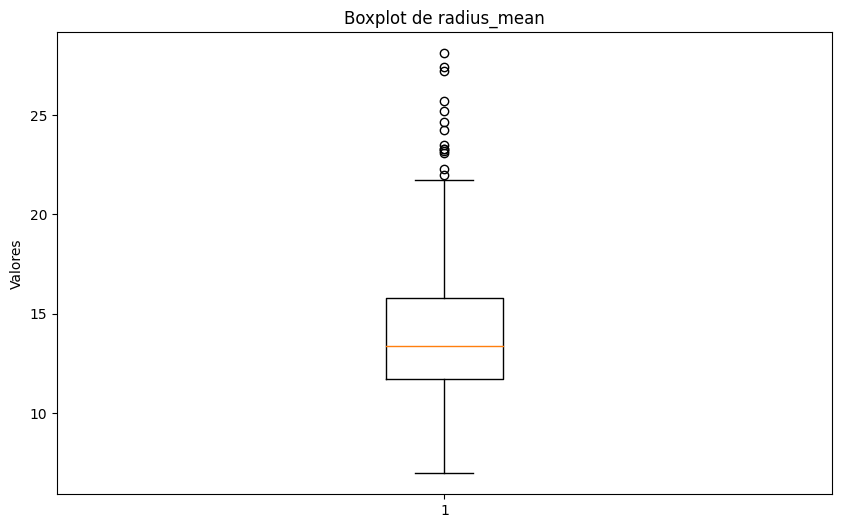

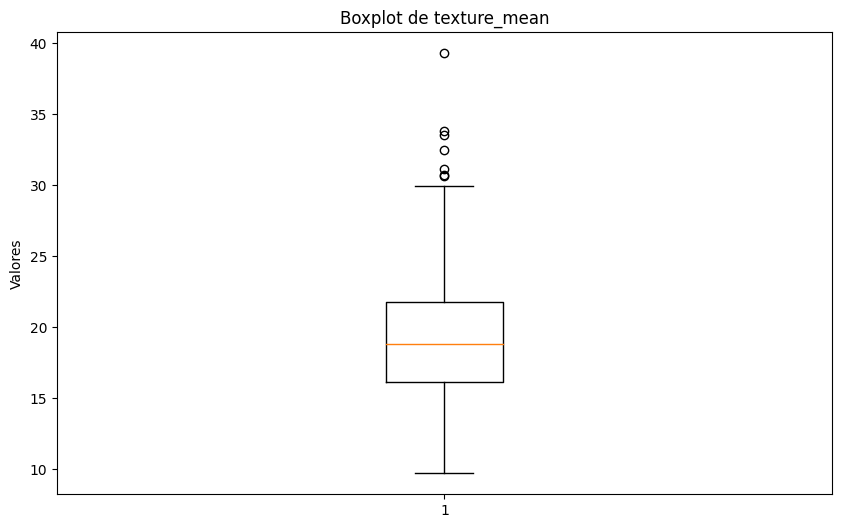

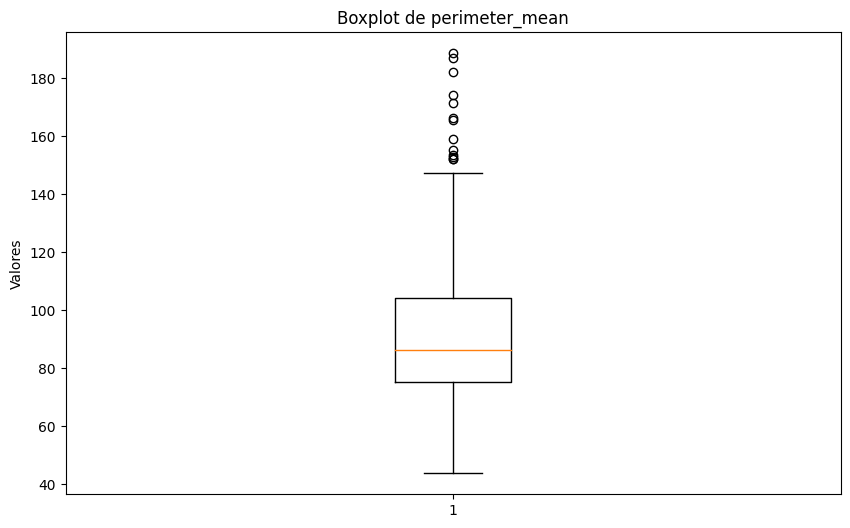

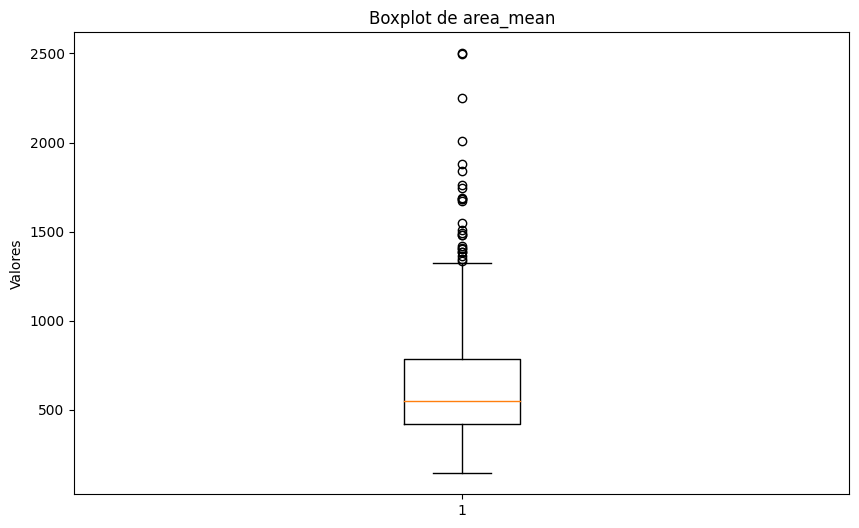

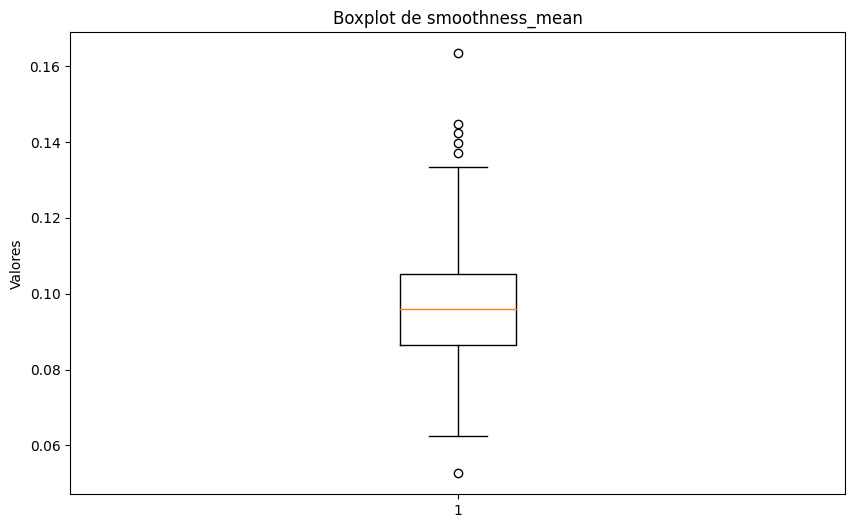

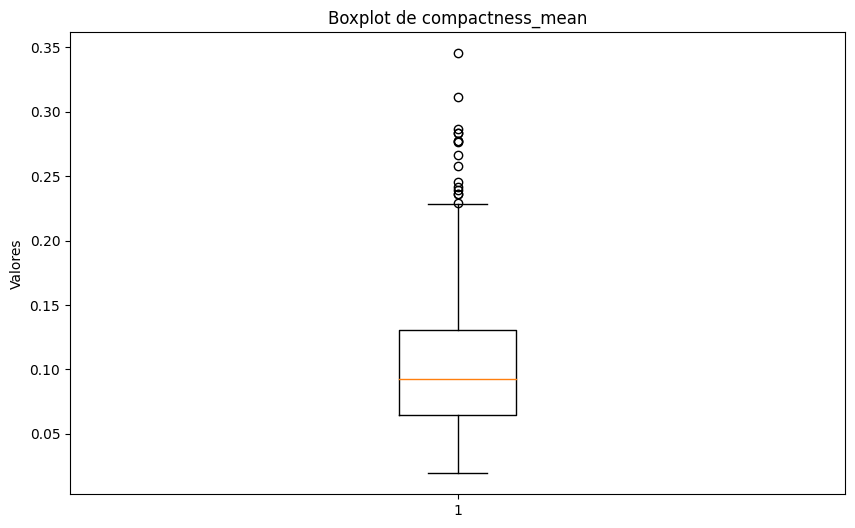

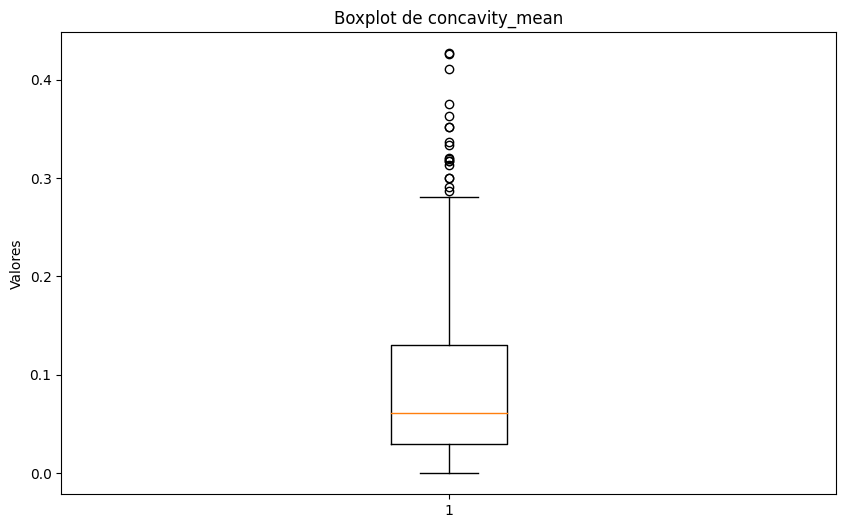

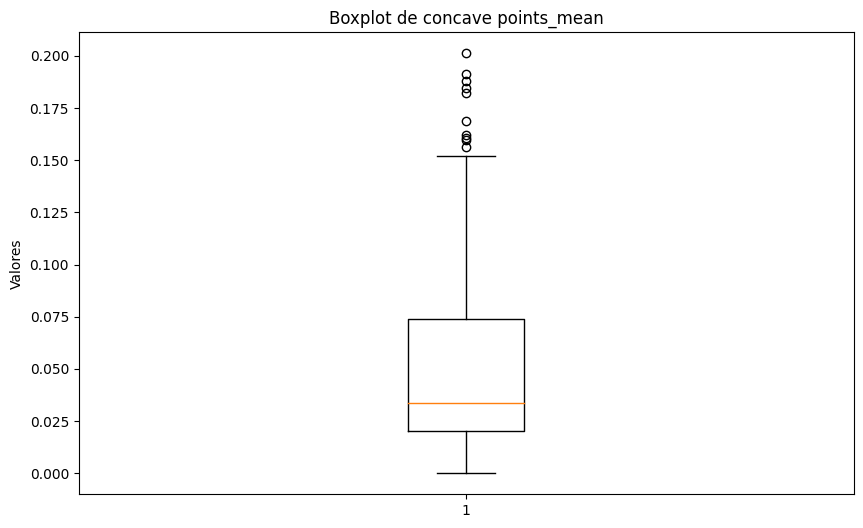

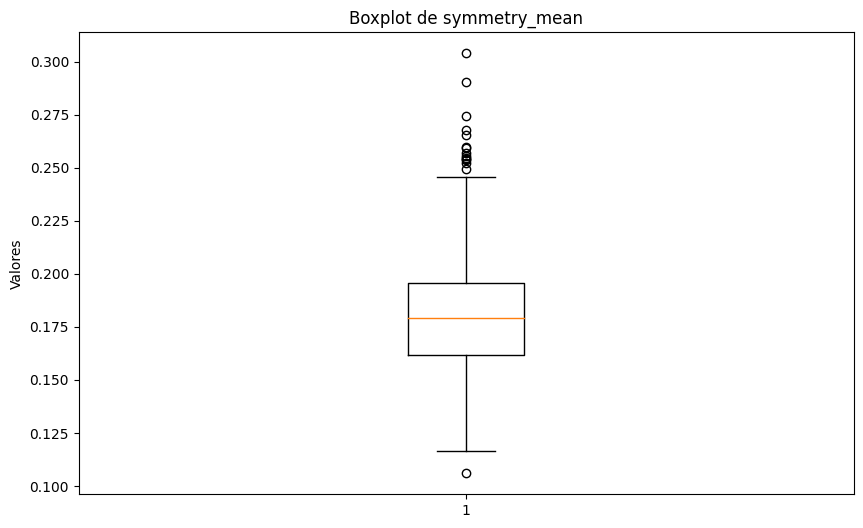

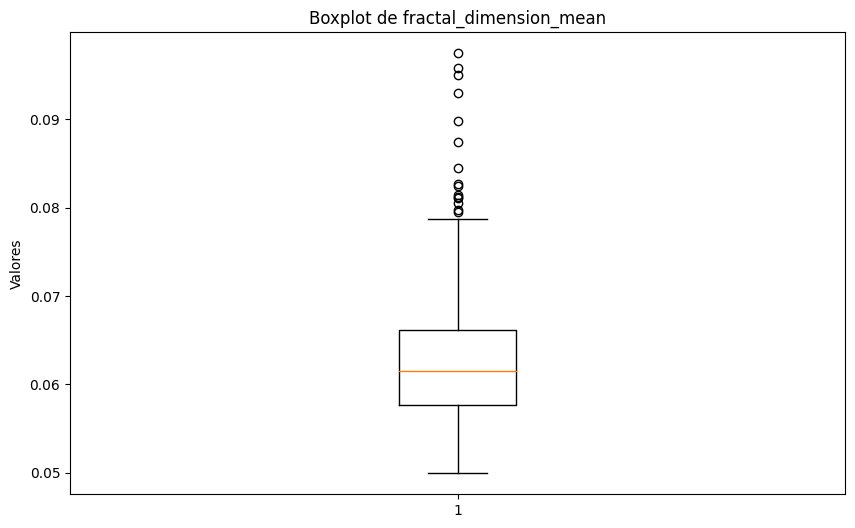

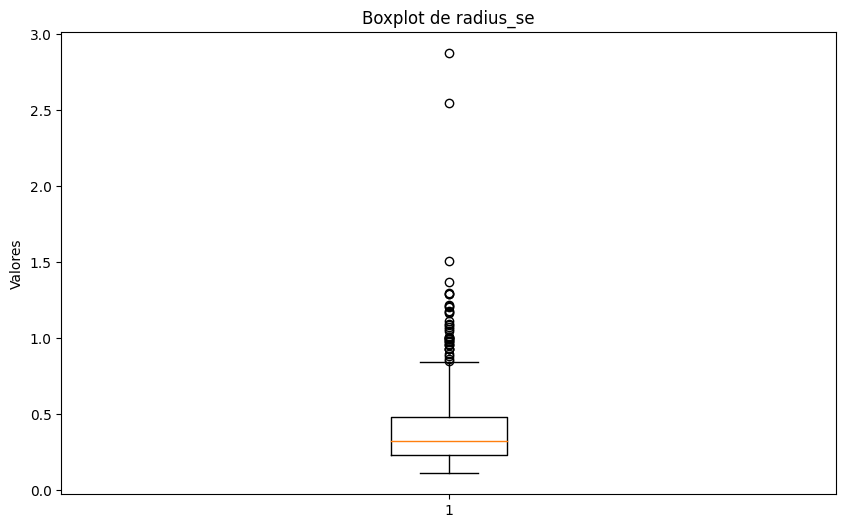

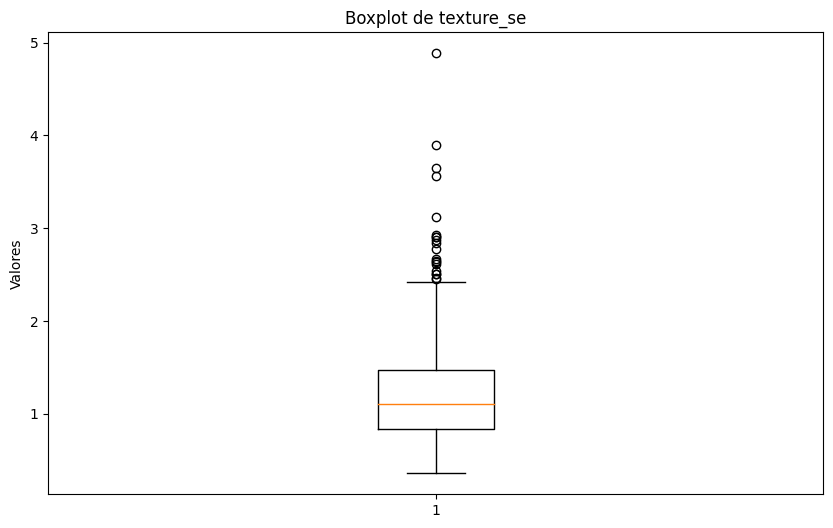

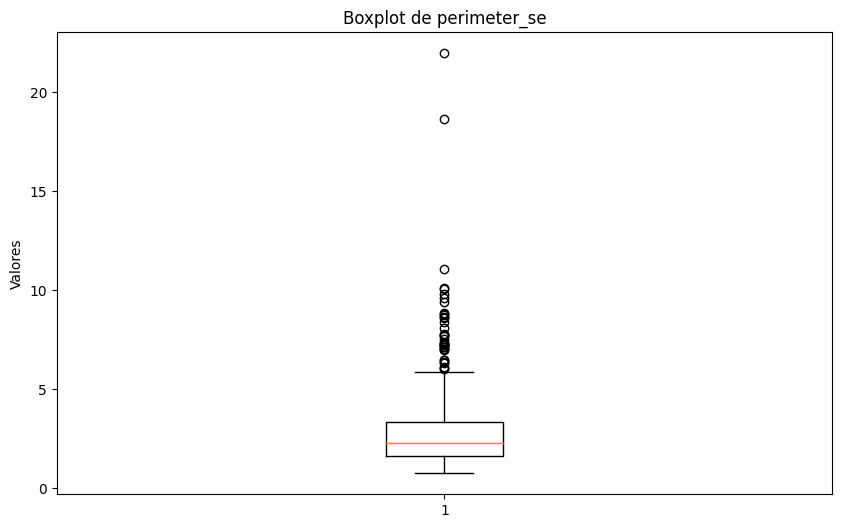

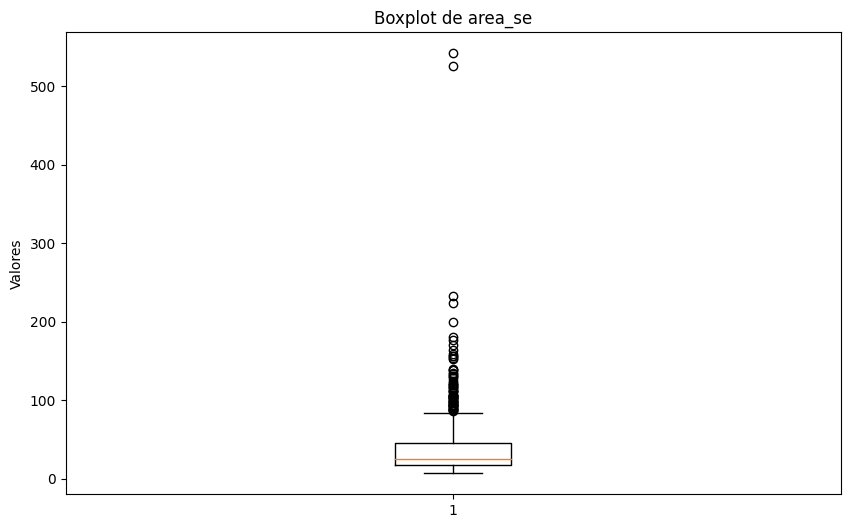

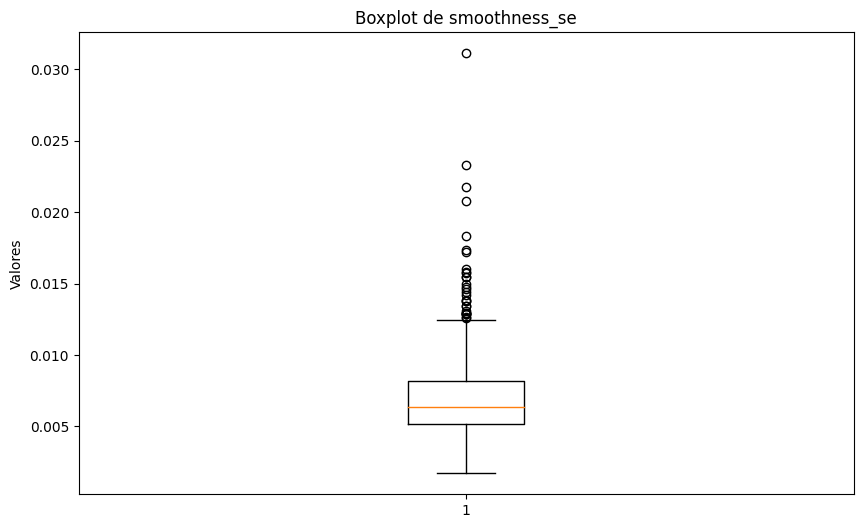

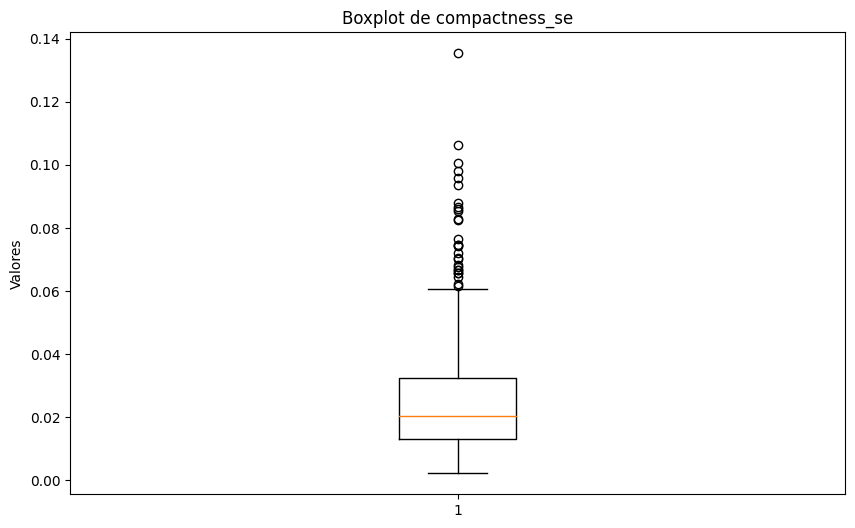

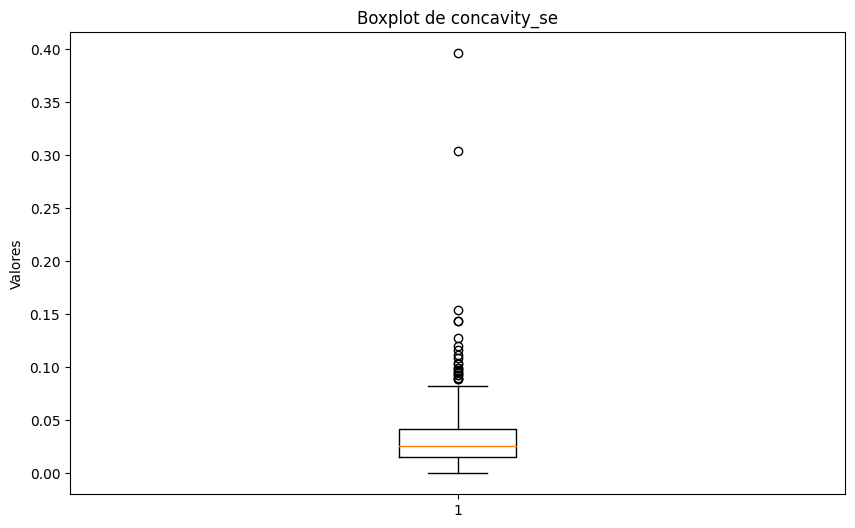

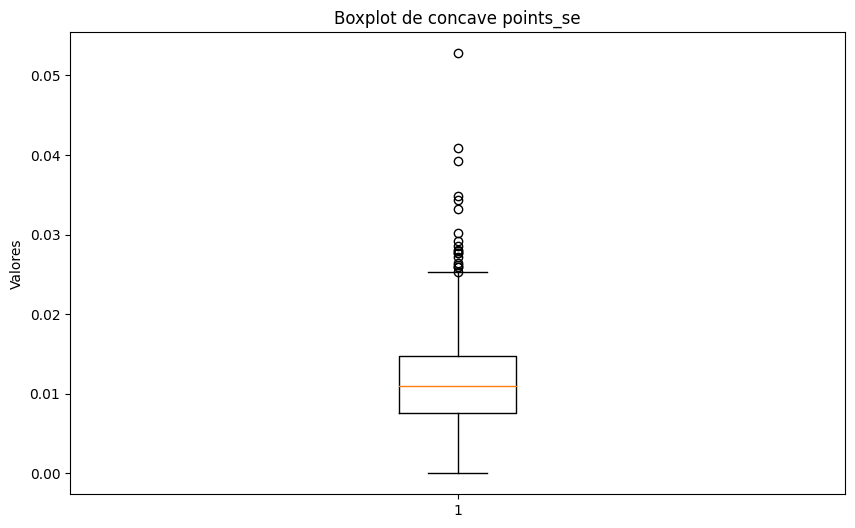

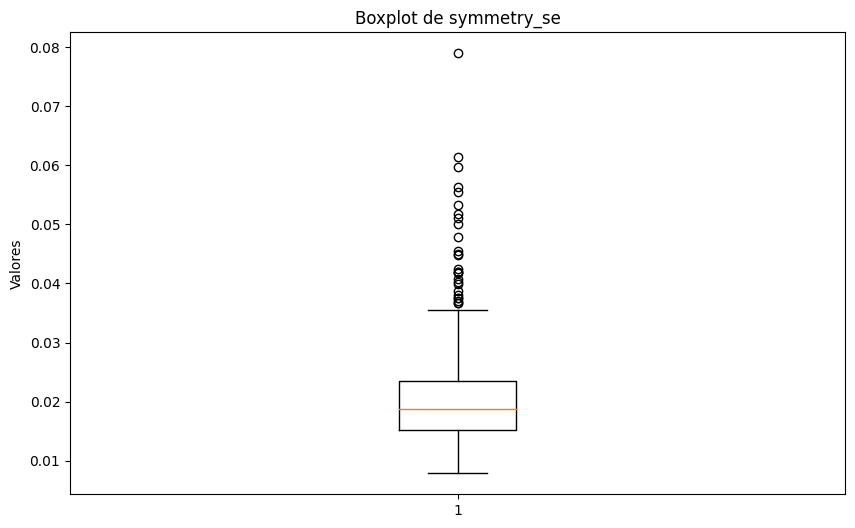

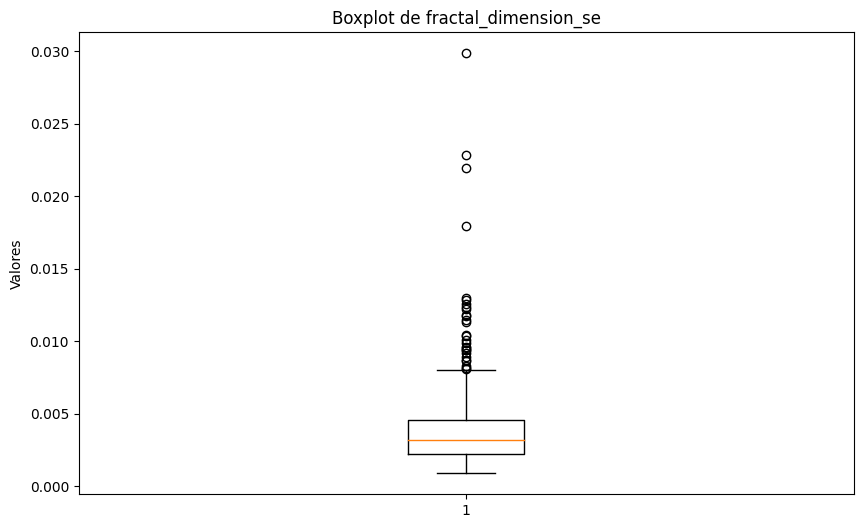

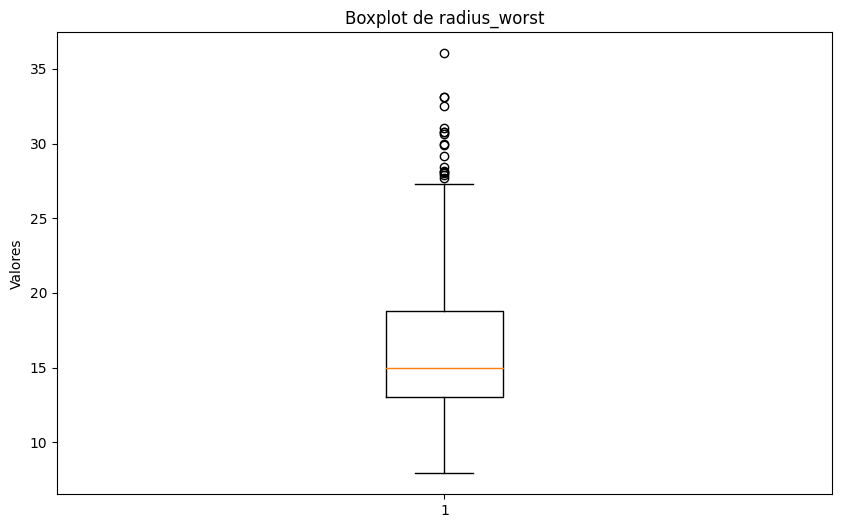

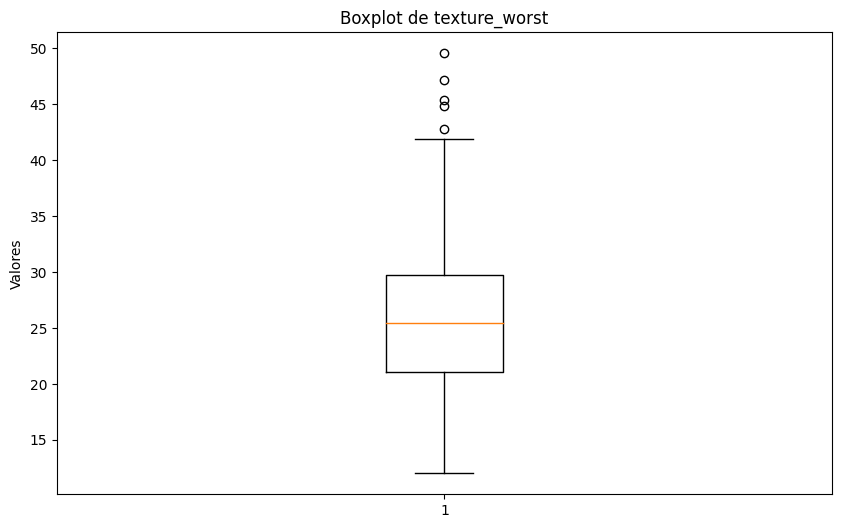

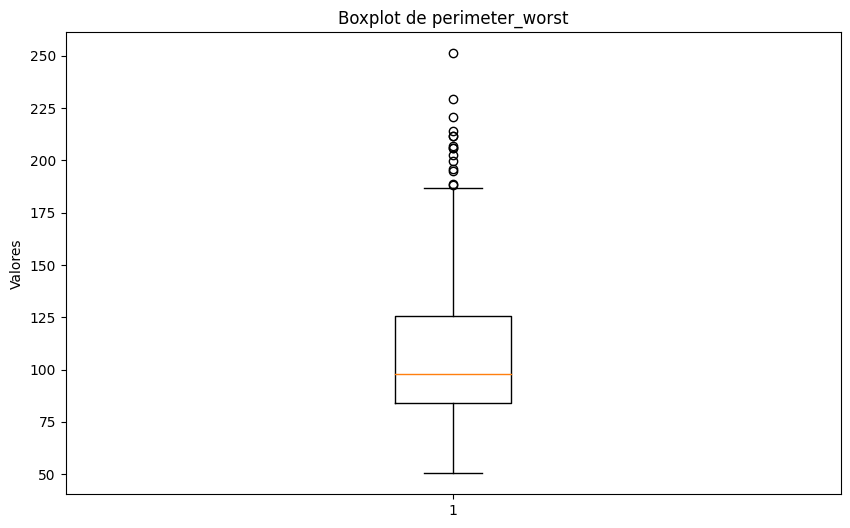

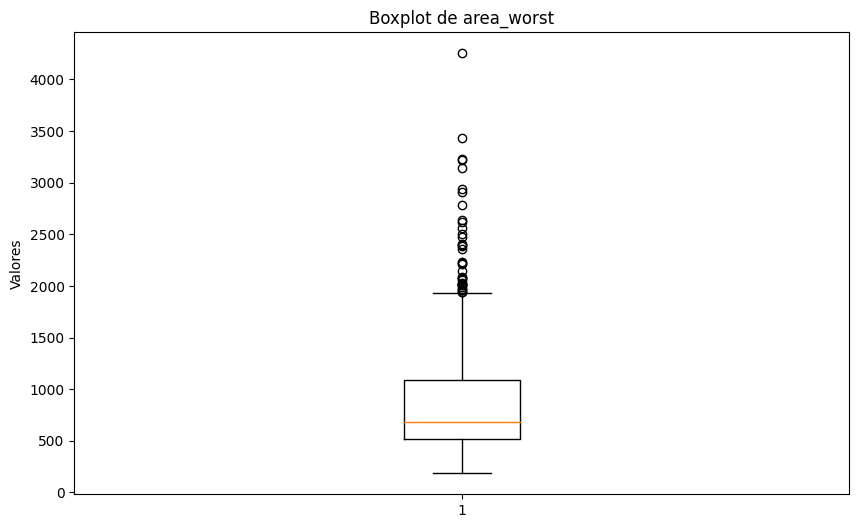

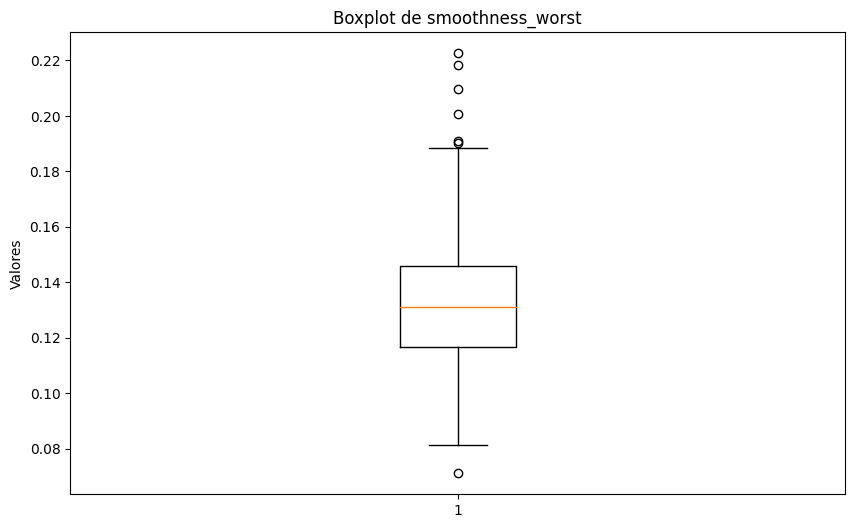

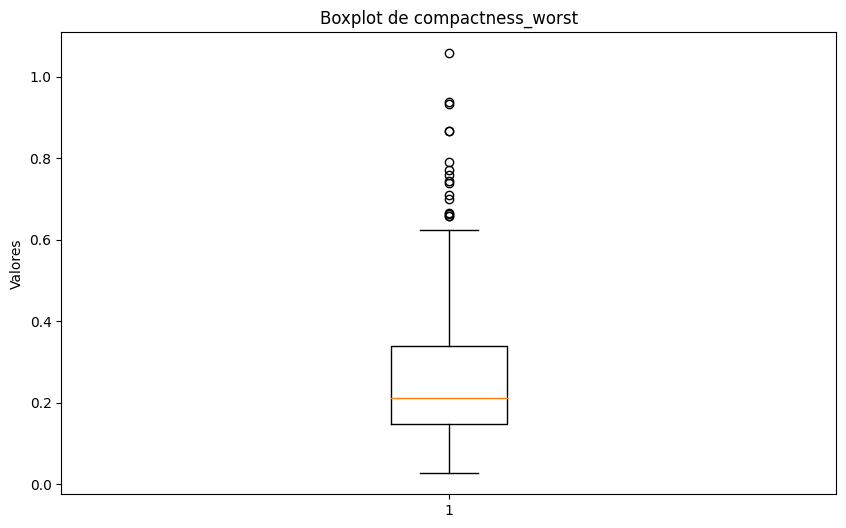

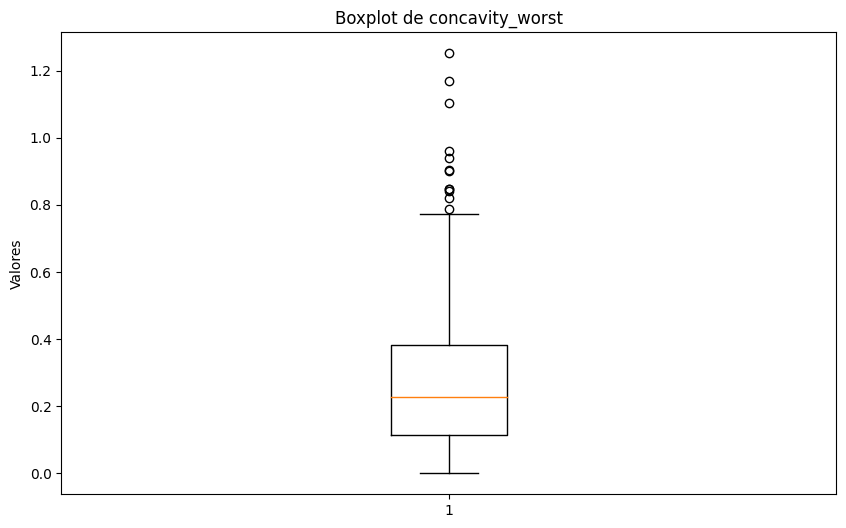

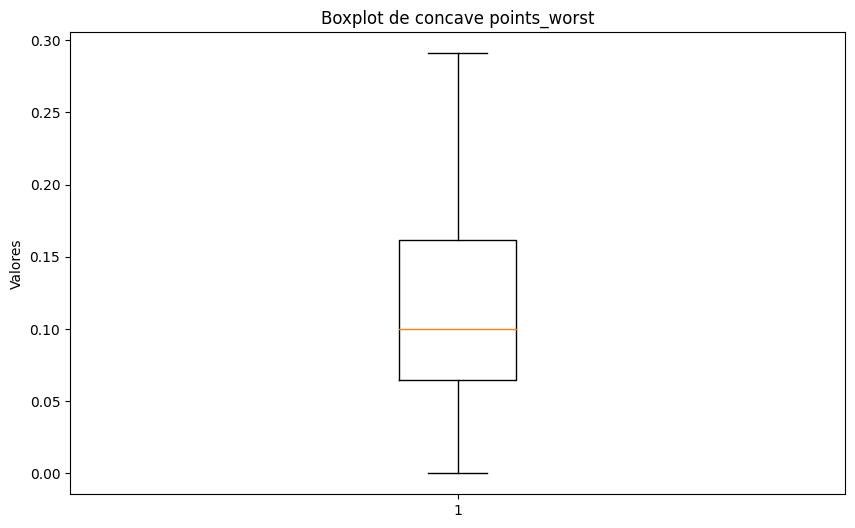

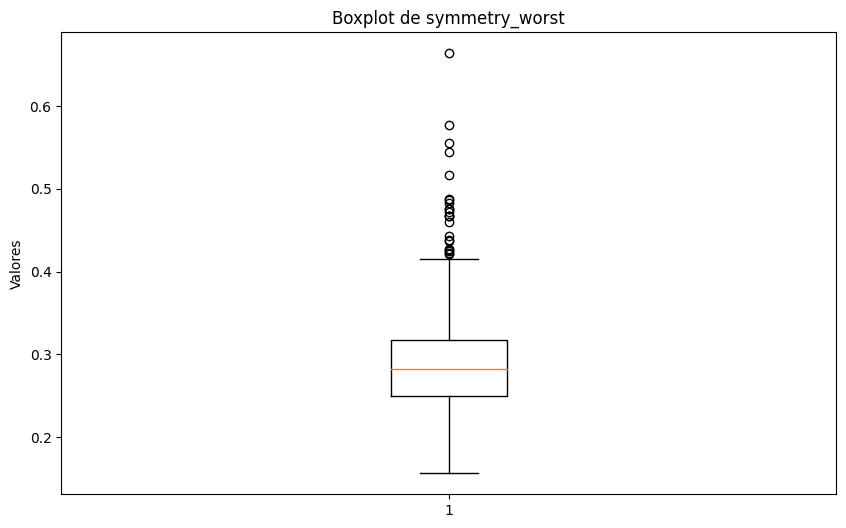

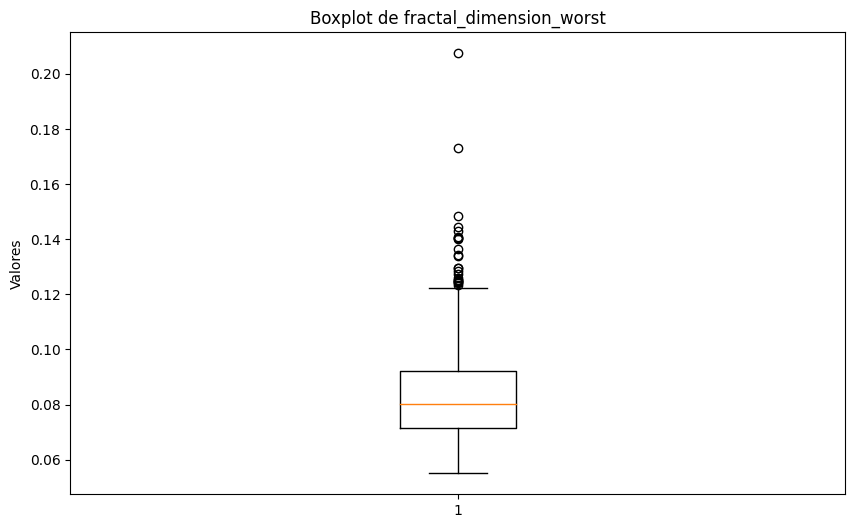

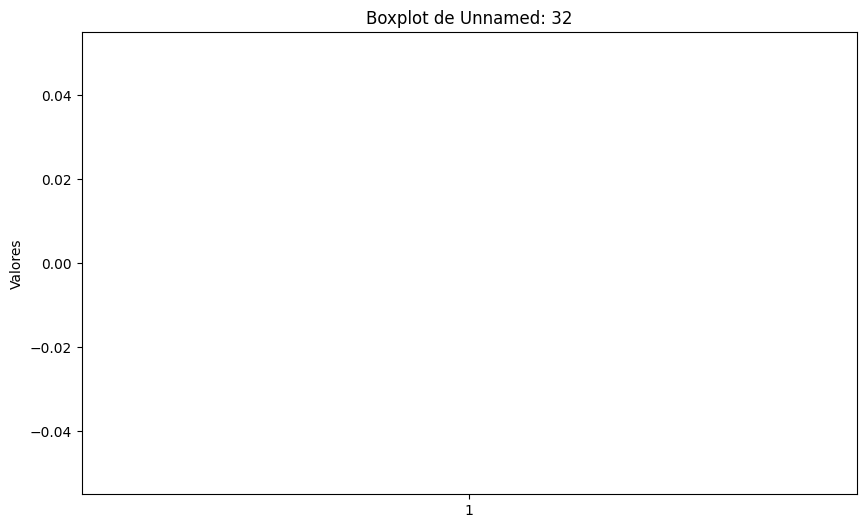

In [5]:
data_num = dataset.drop(["id", "diagnosis"], axis = 1)

for column in data_num.columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(data_num[column])
    plt.title('Boxplot de {}'.format(column))
    plt.ylabel('Valores')
    plt.show()


In [6]:
#quantidade de valores únicos para cada coluna do dataset
dataset.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

###Limpeza e preprocessamento dos dados

Verificando os valores nulos e faltantes.

In [7]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Coluna "Unnamed: 32" é irrelevante pois contém apenas valores NaN

In [8]:
#excluir coluna "Unnamed: 32"
dataset.drop("Unnamed: 32", axis = 1, inplace = True)

A coluna id é uma coluna de identificação única para cada paciente, portanto também pode ser descartada.

In [9]:
#excluir coluna id
dataset.drop("id",axis = 1,inplace = True)
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


####Conversão de atributos categóricos para numéricos

Verificar quantas classes a variável diagnosis(target) possui:

In [10]:
dataset["diagnosis"].unique()

array(['M', 'B'], dtype=object)

Verificar a quantidade de ocorrências de cada classe:

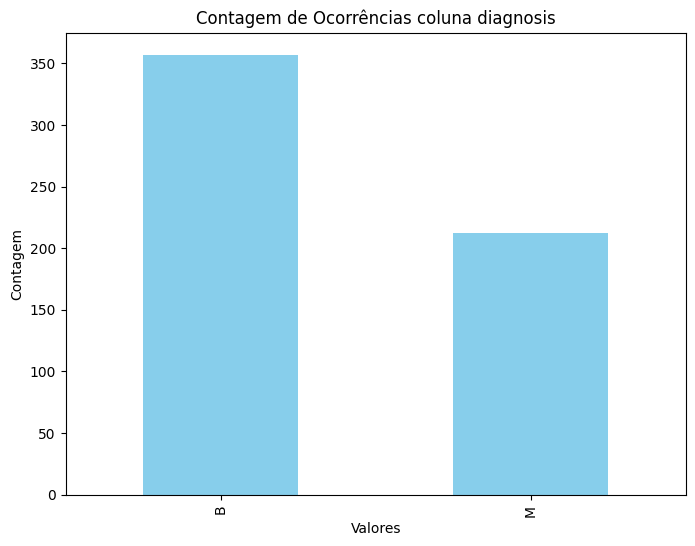

In [11]:
#grafico de barras para target
contagem = dataset['diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
contagem.plot(kind='bar', color='skyblue')
plt.title('Contagem de Ocorrências coluna diagnosis')
plt.xlabel('Valores')
plt.ylabel('Contagem')
plt.show()

In [12]:
dataset["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

A variável alvo é do tipo qualitativa nominal, sendo assim será utilizada a codificação Label Encoder

In [13]:
#convertendo coluna categórica diagnosis(target) para numérica
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
dataset["diagnosis"] = l_encoder.fit_transform(dataset[["diagnosis"]])
dataset

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


####Analisando graficamente a distribuição de cada atributo

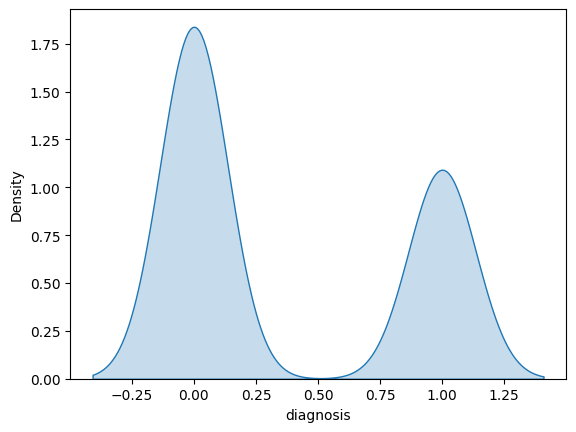

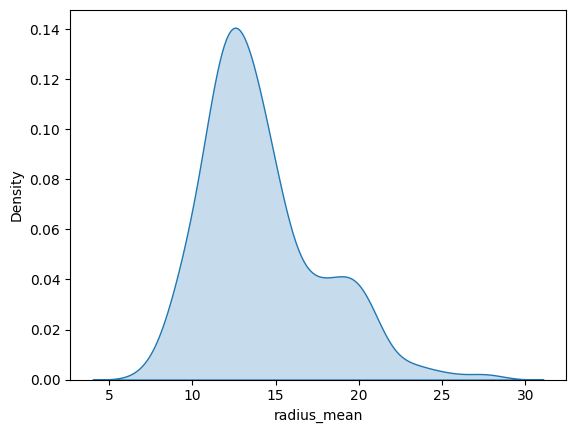

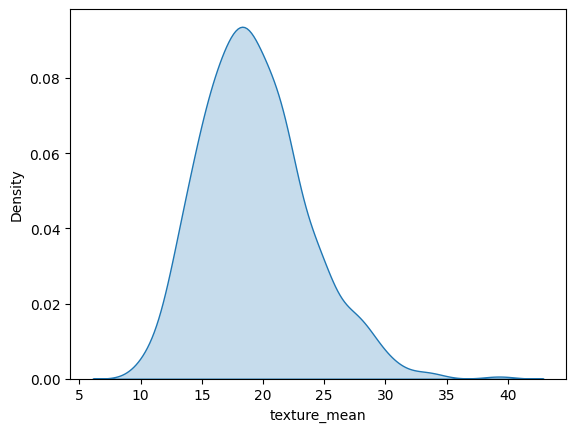

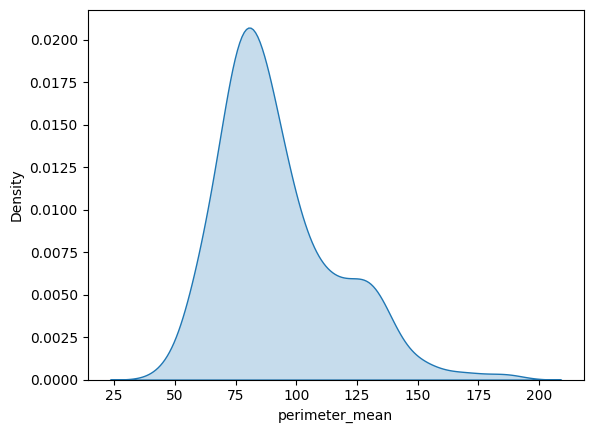

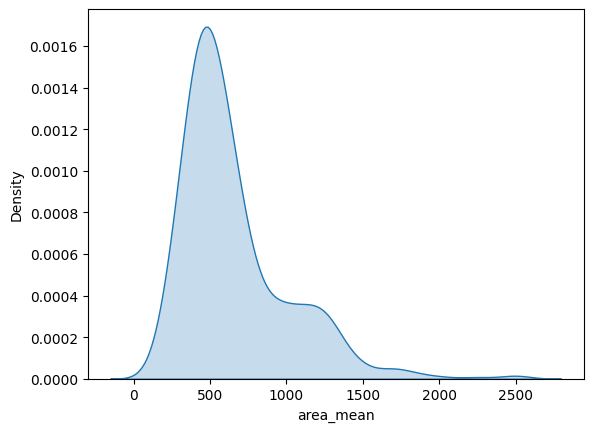

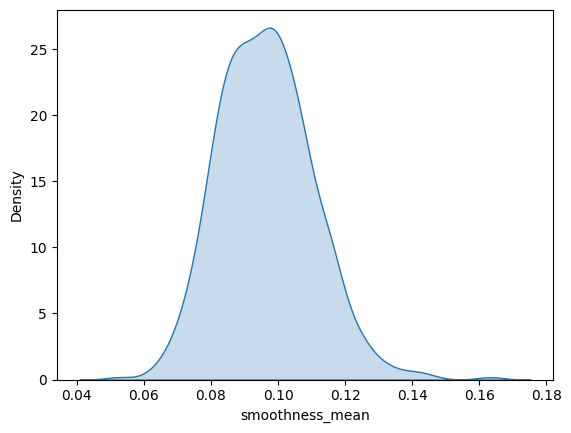

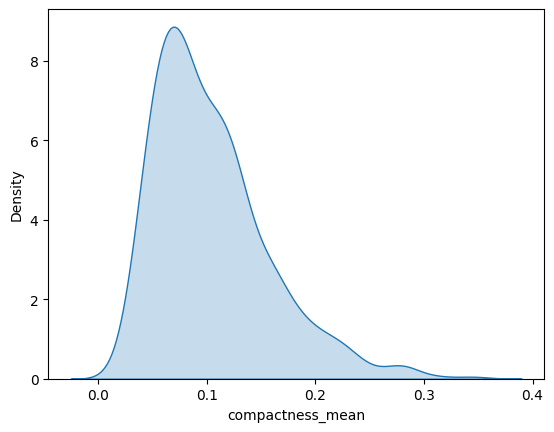

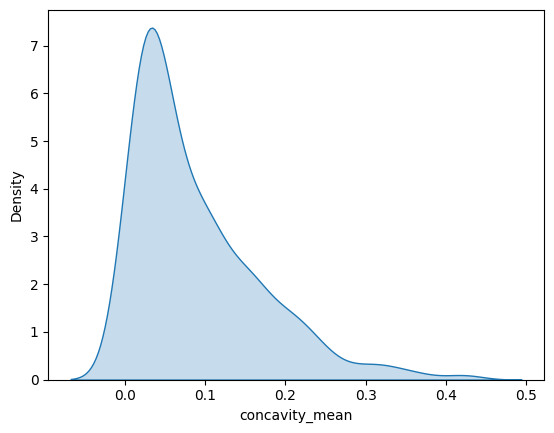

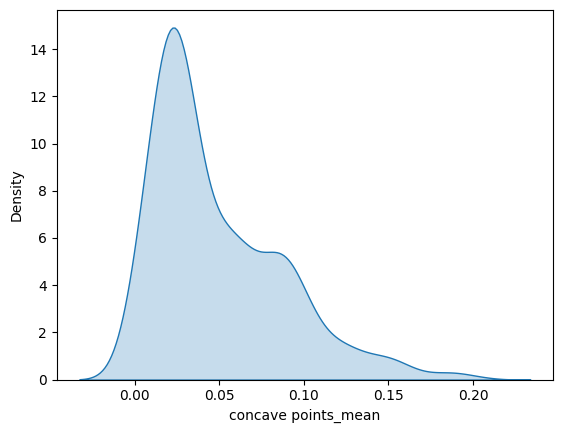

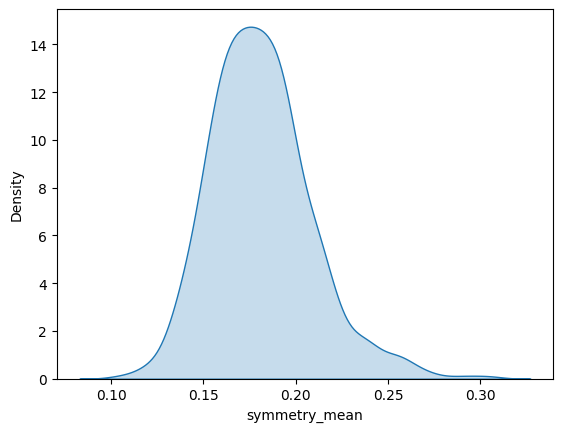

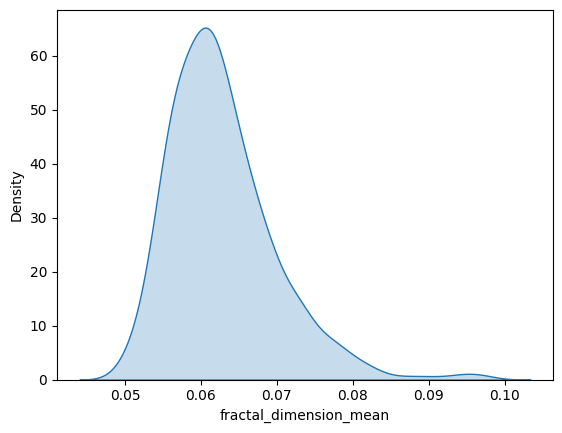

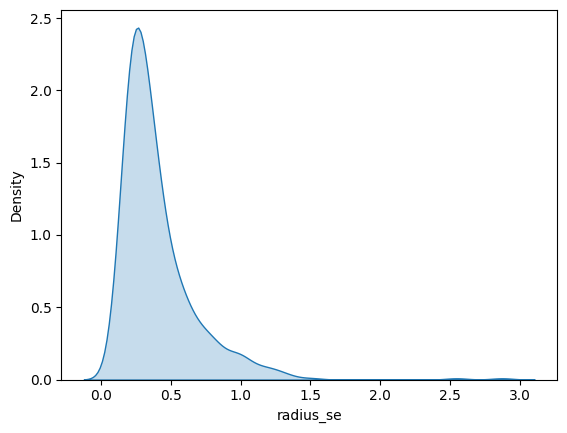

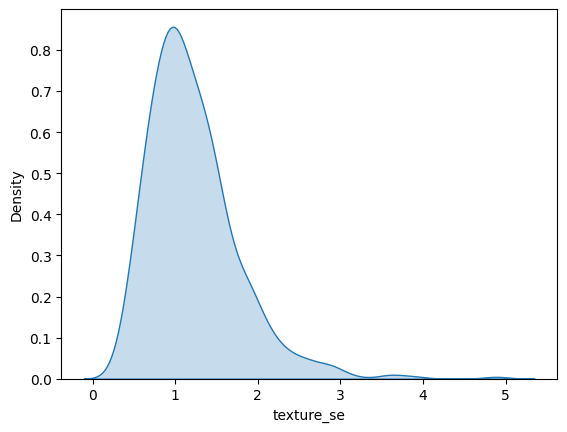

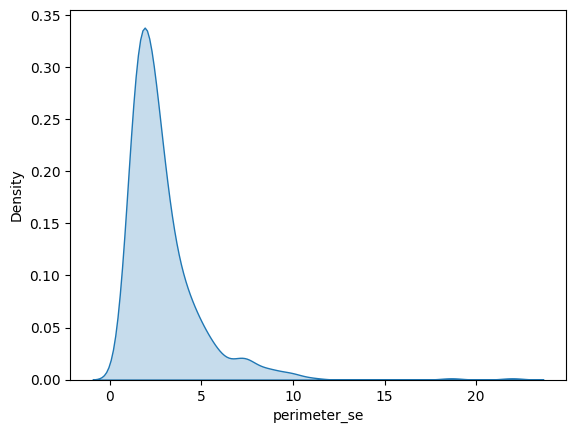

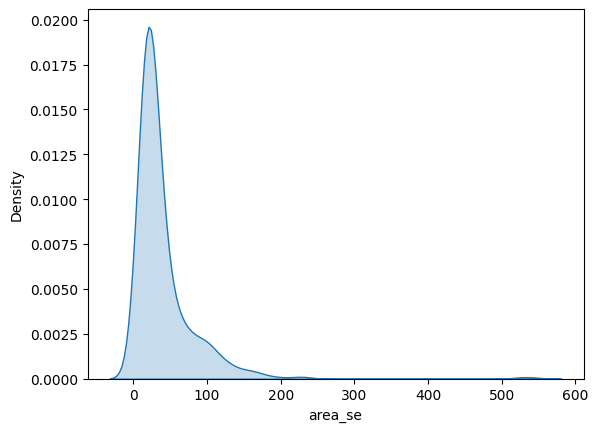

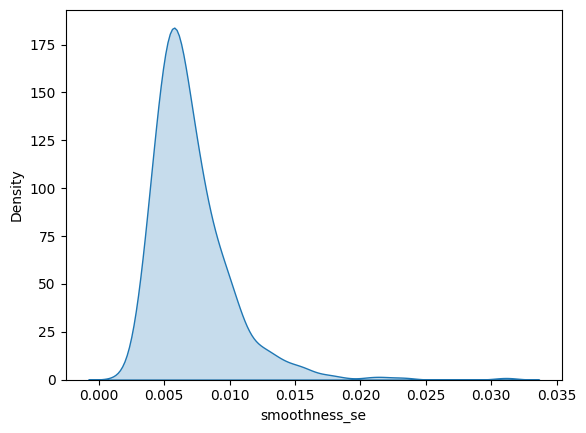

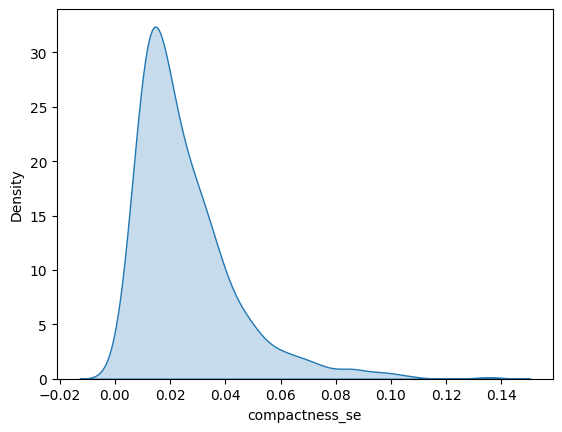

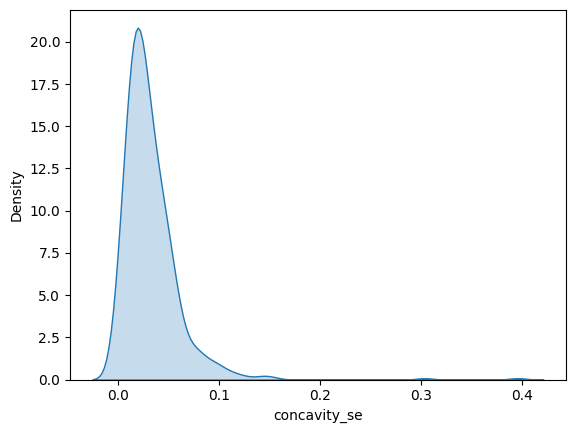

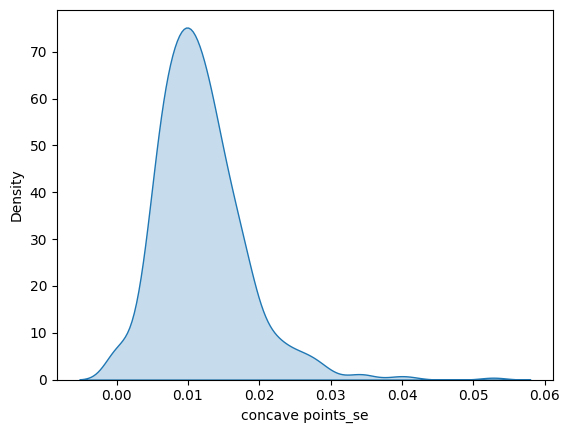

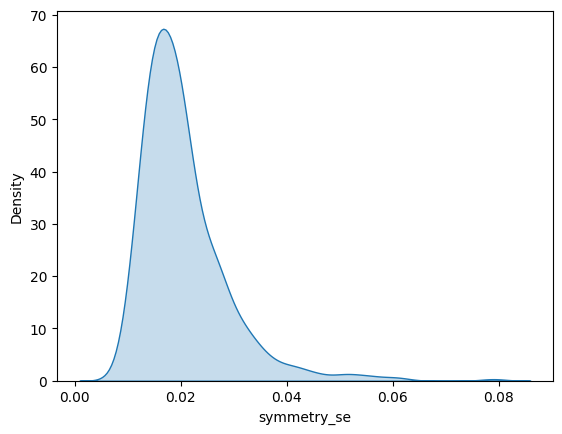

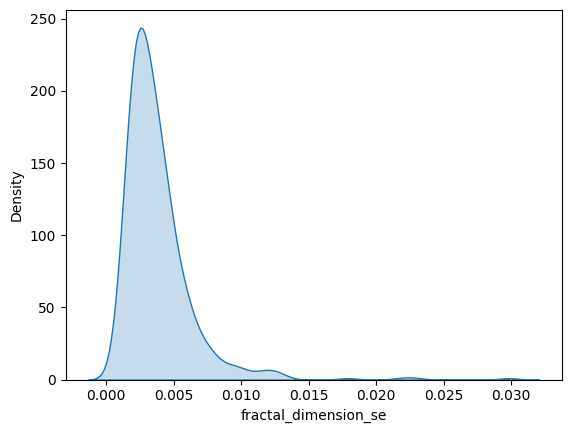

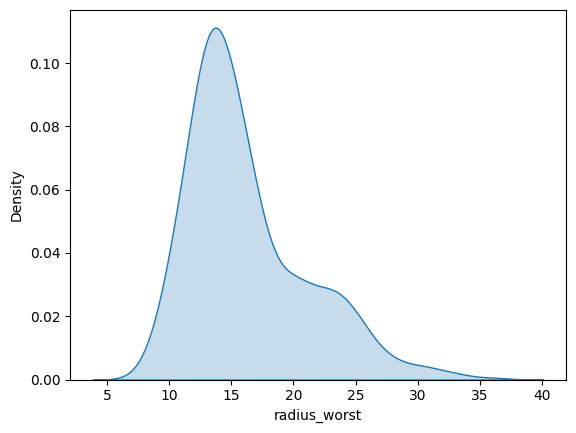

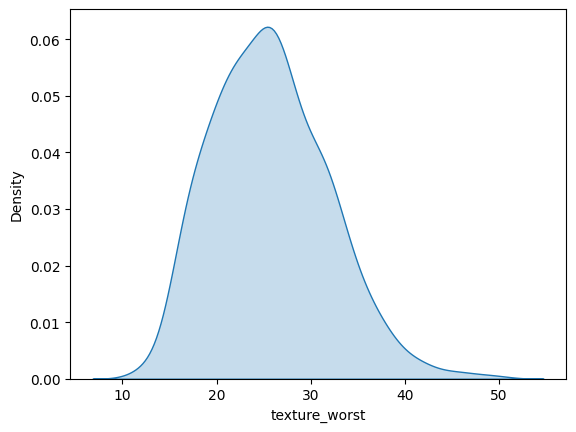

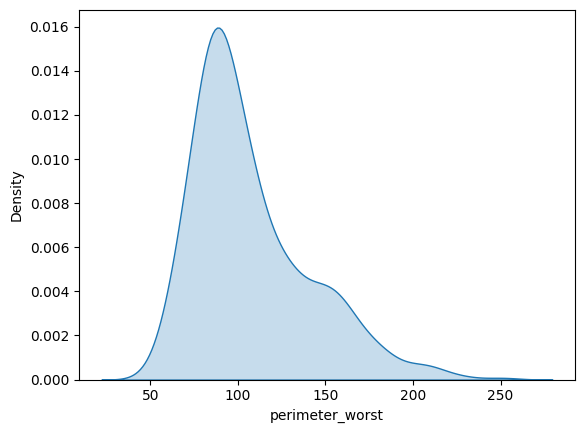

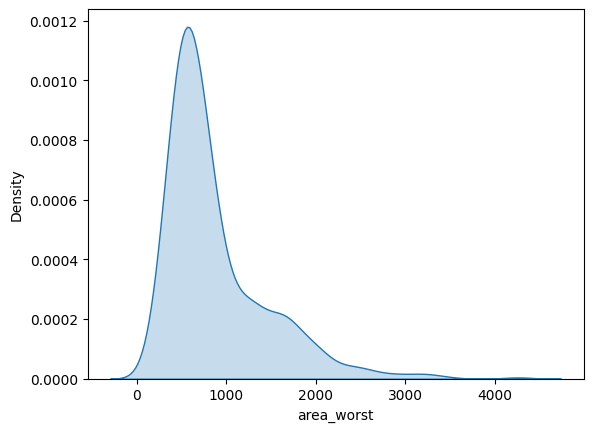

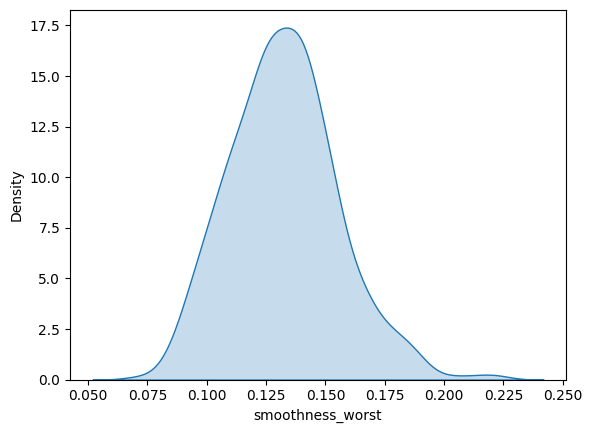

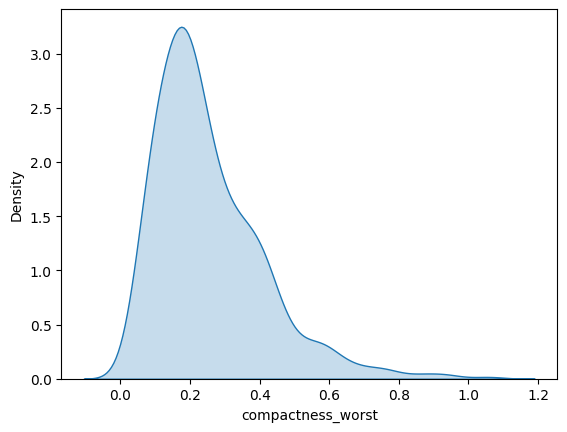

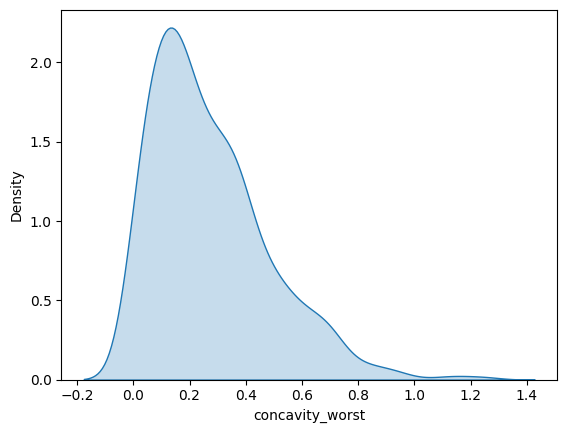

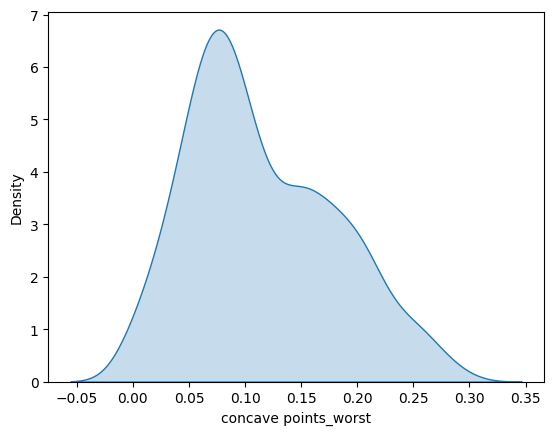

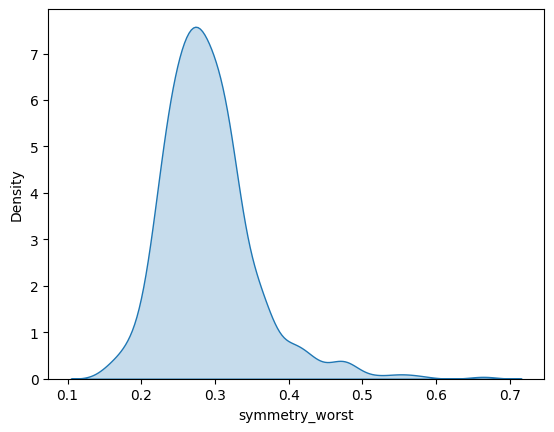

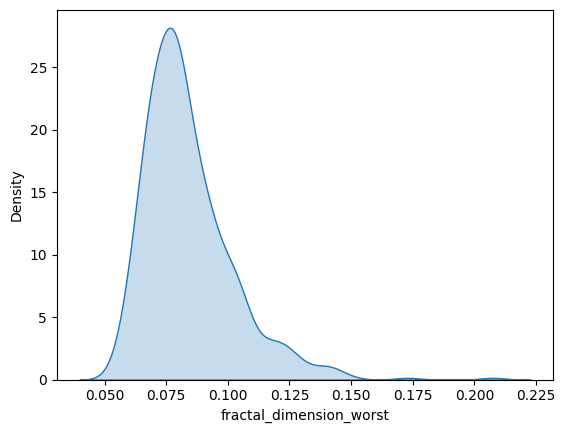

In [14]:
for i in dataset.columns:
  sb.kdeplot(dataset[i], fill=True)
  plt.show()


####Visualizando a distribuição de frequência dos atributos

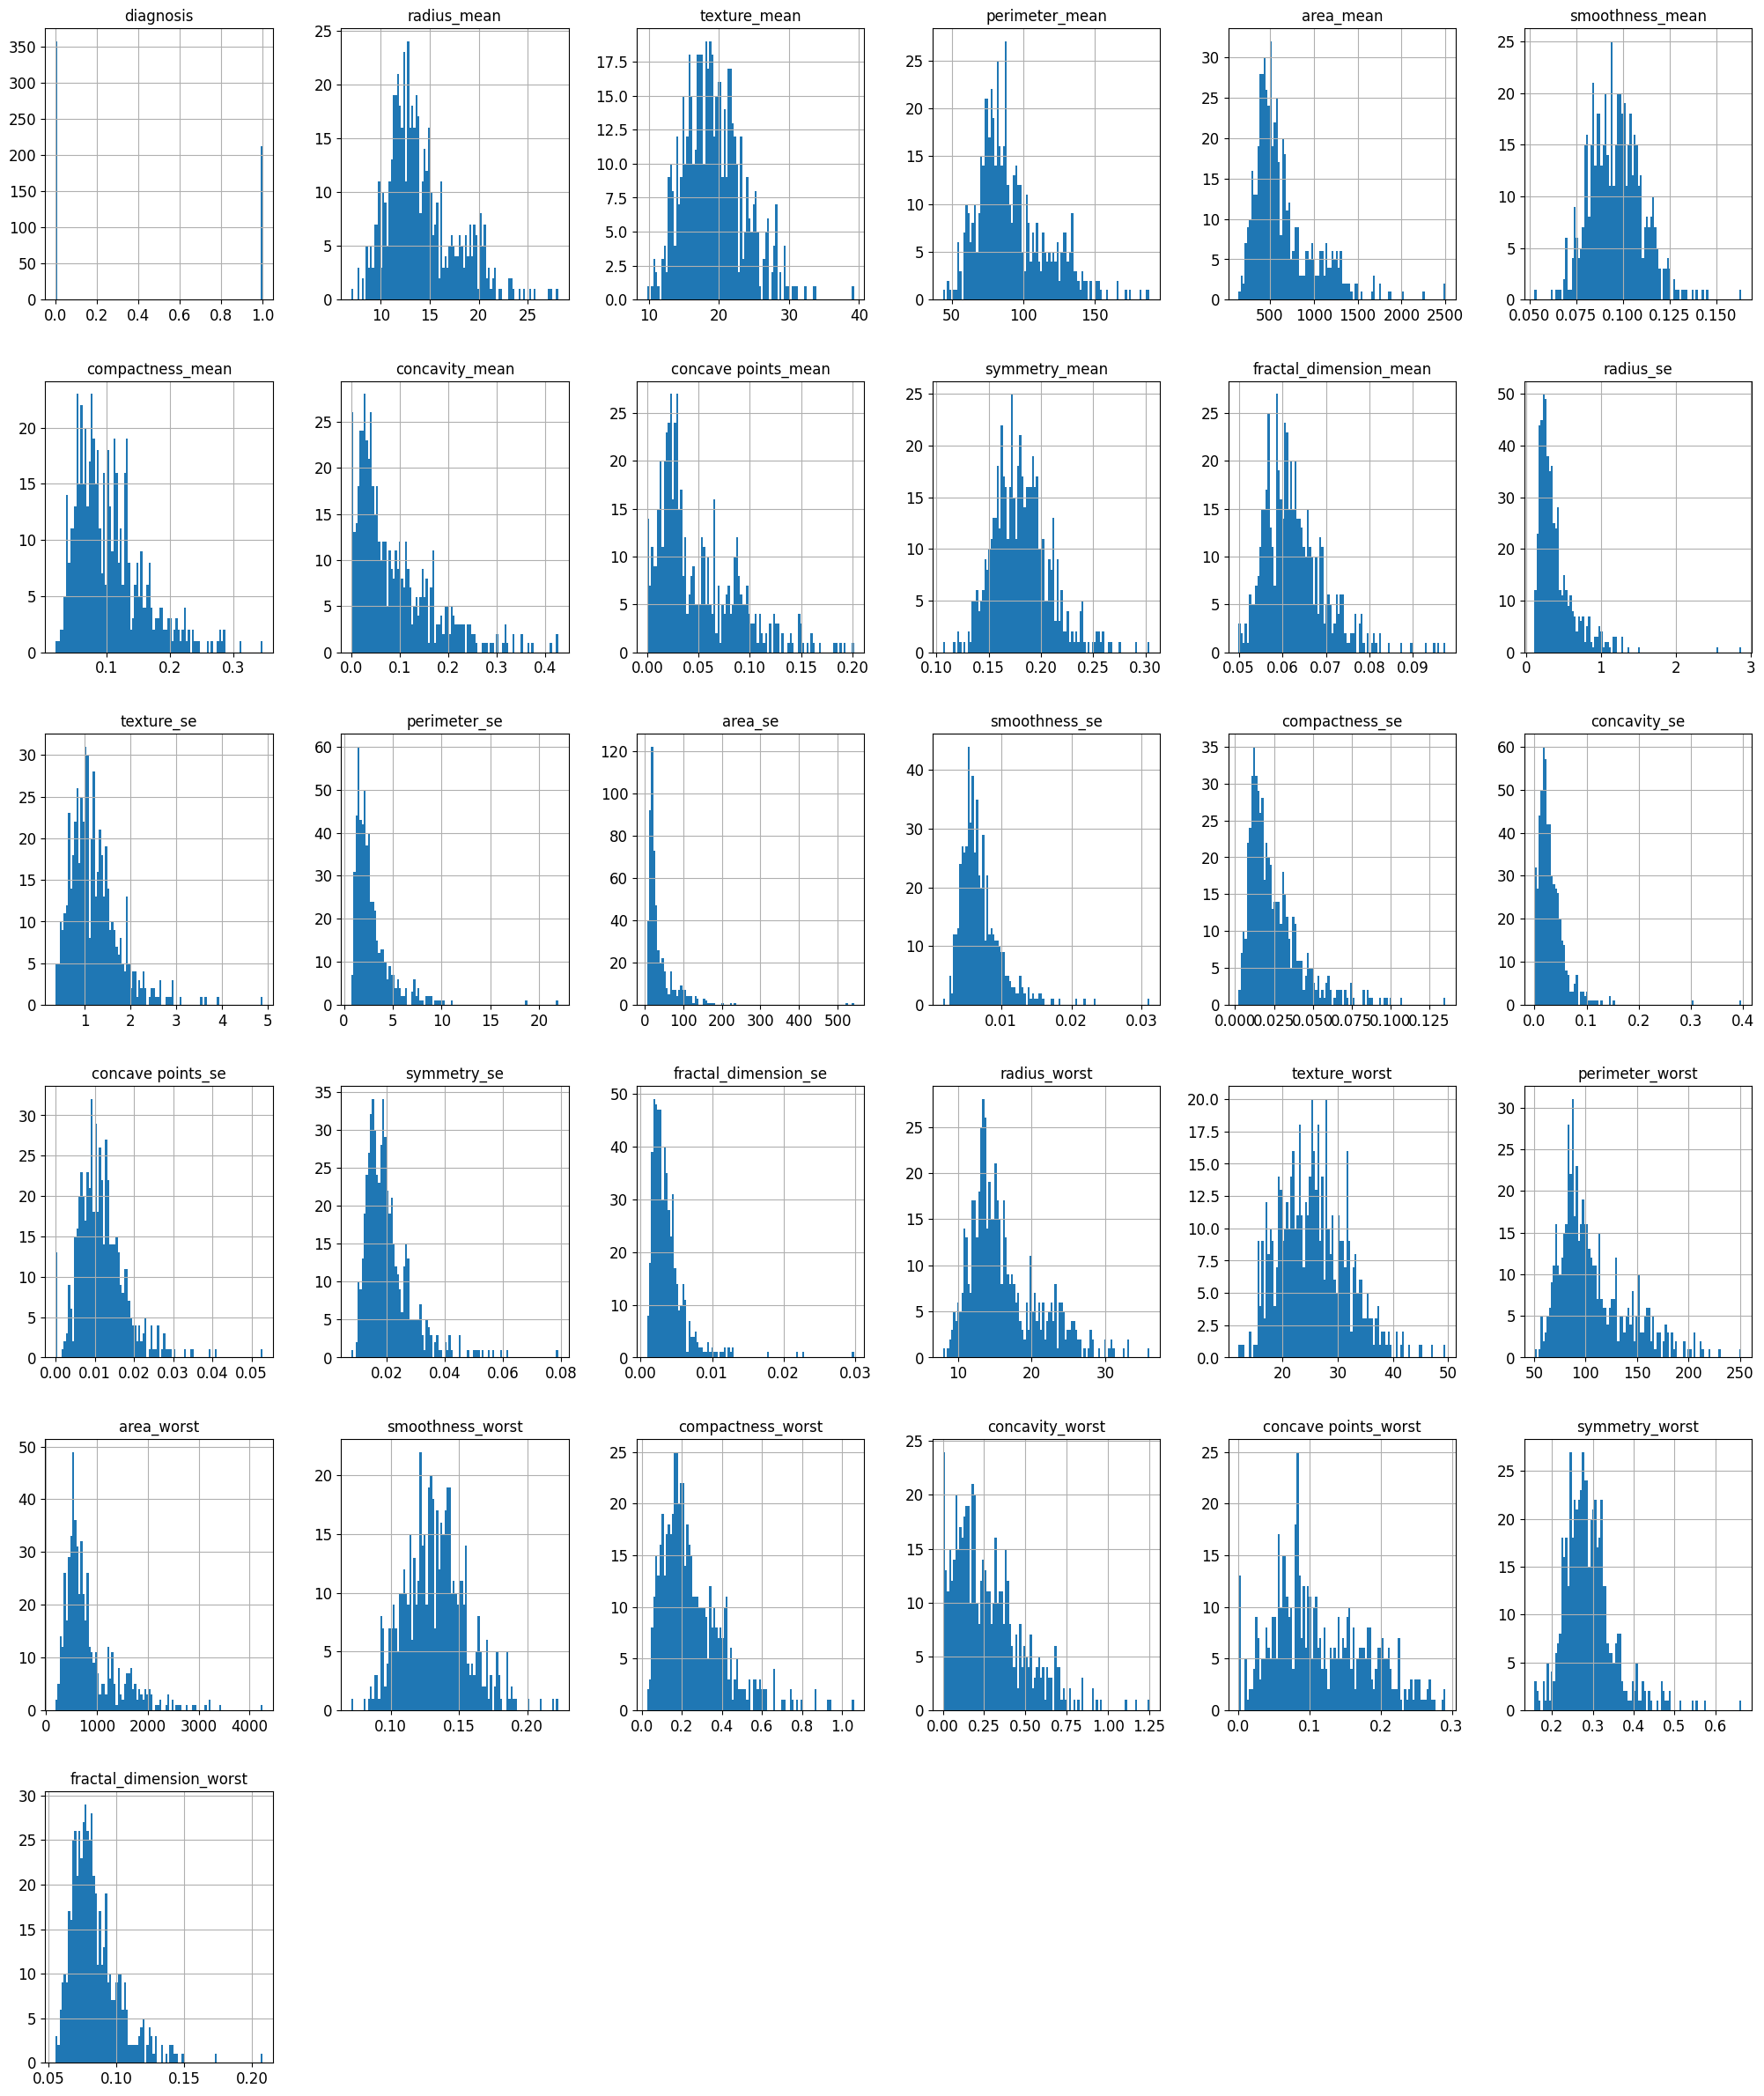

In [15]:
breast = dataset.select_dtypes(include=['int64', 'float64'])
breast.hist(figsize=(25, 30), bins=100, xlabelsize=12, ylabelsize=12);


###Verificando a Correlação entre as variáveis

####Utilizaremos a correlação de Person como métrica para avaliar o relacionamento entre as features e o label.

####Consideremos uma forte correlação para valores próximos a um(1) e uma fraca correlação para os valores próximos a (0).

####Além disso, valores positivos representam grandezas diretamente proporcionais e valores negativos representam grandezas inversamente proporcionais.

<function matplotlib.pyplot.show(close=None, block=None)>

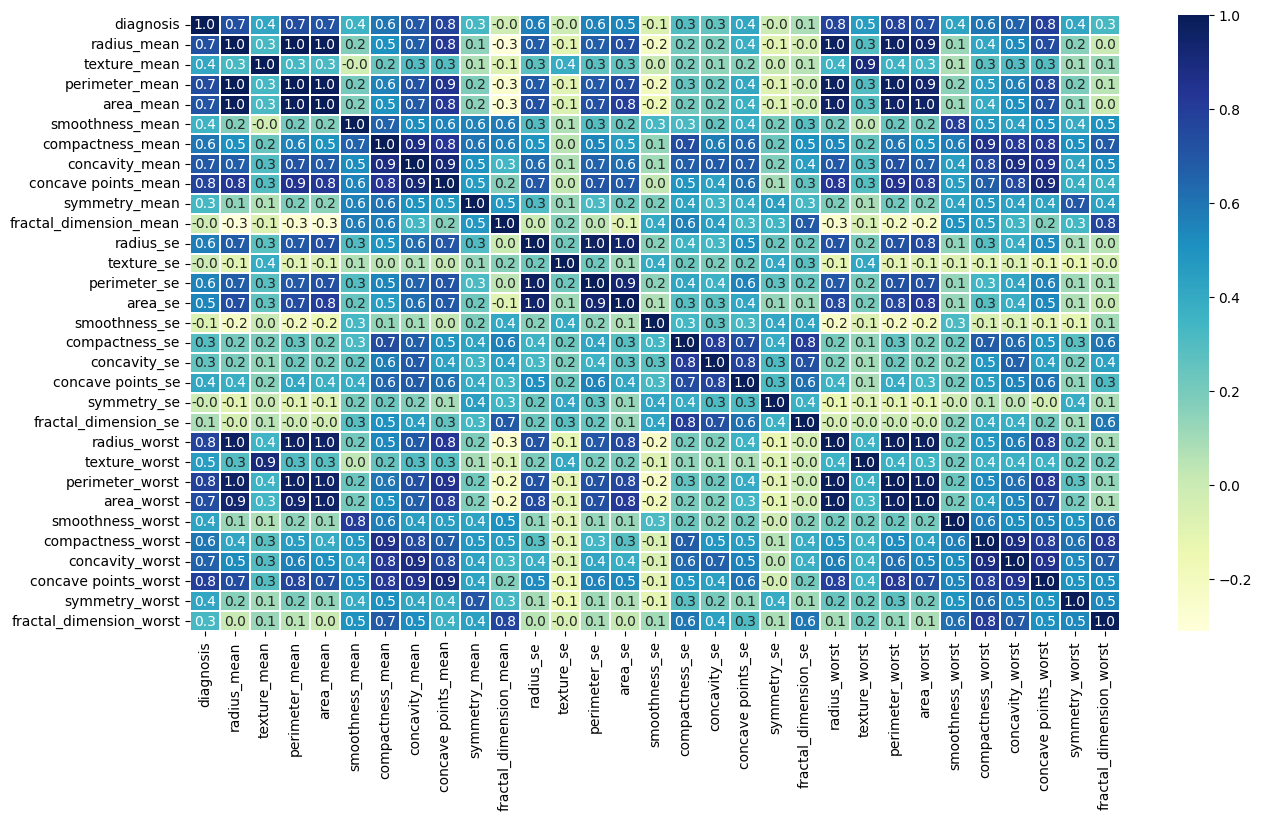

In [16]:
correlacao = dataset.corr()
plt.figure(figsize=(15, 8))
matriz_c = sb.heatmap(correlacao, annot = True, fmt=".1f",cmap="YlGnBu", linewidths=0.25)
plt.show

**Separando** x e y

In [17]:
y = dataset["diagnosis"]
x = dataset.drop("diagnosis", axis = 1)

####Normalizando os valores

Aplicando a normalização para deixar os dados na escala de 0-1

In [18]:
min_max_escaler = MinMaxScaler()
escaled = min_max_escaler.fit_transform(x)
x = pd.DataFrame(escaled)
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


###Instanciação dos modelos e Treinamento

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

arv1 = DecisionTreeClassifier(criterion="entropy", max_depth=2)
arv2 = DecisionTreeClassifier(criterion="gini", max_depth=2)
knn1 = KNeighborsClassifier(n_neighbors= 5, metric="euclidean")
knn2 = KNeighborsClassifier(n_neighbors= 3, metric="cosine")
mlp1 = MLPClassifier(hidden_layer_sizes=(20,10), activation='tanh',max_iter=2000)
mlp2 = MLPClassifier(hidden_layer_sizes=(20,10), activation='logistic',max_iter=2000)
svm1 = SVC(kernel="linear", gamma="scale", C=100)
svm2 = SVC(kernel="poly", gamma="scale", C =100)
forest1 = RandomForestClassifier(n_estimators=200, criterion="gini")
forest2 = RandomForestClassifier(n_estimators=200, criterion="entropy")
gradient = GradientBoostingClassifier(n_estimators= 200)


Estruturas que irão armazenar os resultados obtidos da predição dos modelos de Machine Learning

In [20]:
models = {}
models["Decision Tree 1"] = [arv1, []]
models["Decision Tree"] = [arv2, []]
models["KNN 1"] = [knn1, []]
models["KNN 2"] = [knn2, []]
models["Rede Neural MLP 1"] = [mlp1, []]
models["Rede Neural MLP 2"] = [mlp2, []]
models["SVM"] = [svm1, []]
models["SVM 2"] = [svm2, []]
models["Random Forest 1"] = [forest1, []]
models["Random Forest 2"] = [forest2, []]
models["Gradiente Boost"] = [gradient, []]


**Separação dos dados e treinamento de modelos**

Cada modelo foi executado 10 vezes utilizando a mesma disposição de dados em cada iteração, o que permitirá avaliar e comparar o desempenho dos modelos

In [21]:

from sklearn import metrics
from sklearn.model_selection import train_test_split
result = {}

for i in range(10):
   x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
   for name, [model, acc_list] in models.items():
      model.fit(x_train, y_train)
      result = model.predict(x_test)
      acc = round(metrics.accuracy_score(result, y_test) * 100, 4)
      acc_list.append(acc)

###Resultados e Avaliação de desempenho dos modelos

Impressão da lista dos valores de acurácia de cada modelo e a média aritmética simples das dez execuções

In [22]:
list_acc_media = []

for name, [model, acc_list] in models.items():
    print("Modelo: {}".format(name))
    print("Lista de valores de Acurácia: {}".format(acc_list))
    media = round(sum(acc_list)/len(acc_list), 3)
    print("Média: {} %".format(media))
    list_acc_media.append((name, media))
    print()

Modelo: Decision Tree 1
Lista de valores de Acurácia: [89.4737, 91.2281, 90.3509, 91.2281, 90.3509, 90.3509, 94.7368, 90.3509, 92.1053, 92.9825]
Média: 91.316 %

Modelo: Decision Tree
Lista de valores de Acurácia: [90.3509, 89.4737, 93.8596, 93.8596, 95.614, 90.3509, 96.4912, 90.3509, 92.9825, 93.8596]
Média: 92.719 %

Modelo: KNN 1
Lista de valores de Acurácia: [97.3684, 94.7368, 97.3684, 98.2456, 96.4912, 95.614, 97.3684, 96.4912, 97.3684, 98.2456]
Média: 96.93 %

Modelo: KNN 2
Lista de valores de Acurácia: [88.5965, 89.4737, 87.7193, 91.2281, 92.1053, 91.2281, 90.3509, 92.9825, 88.5965, 94.7368]
Média: 90.702 %

Modelo: Rede Neural MLP 1
Lista de valores de Acurácia: [98.2456, 95.614, 95.614, 98.2456, 99.1228, 96.4912, 98.2456, 96.4912, 97.3684, 98.2456]
Média: 97.368 %

Modelo: Rede Neural MLP 2
Lista de valores de Acurácia: [98.2456, 96.4912, 98.2456, 98.2456, 99.1228, 97.3684, 98.2456, 97.3684, 99.1228, 98.2456]
Média: 98.07 %

Modelo: SVM
Lista de valores de Acurácia: [97.3684, 

Verificando de forma gráfica

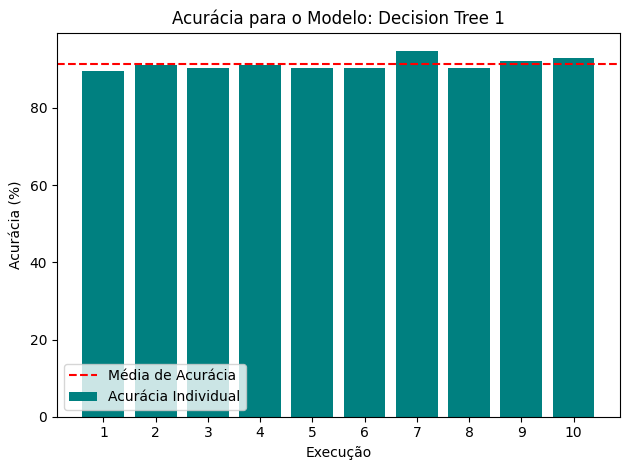

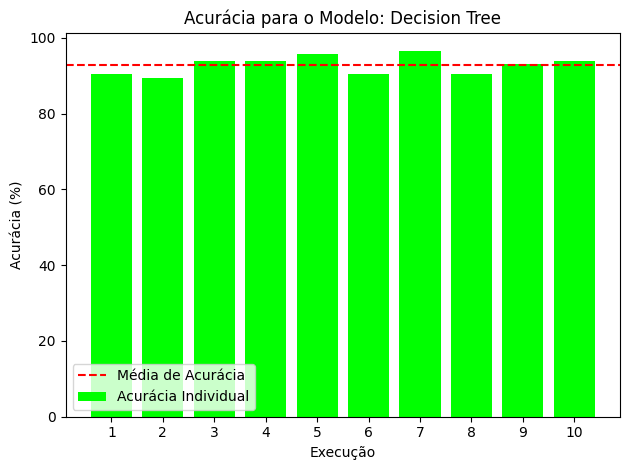

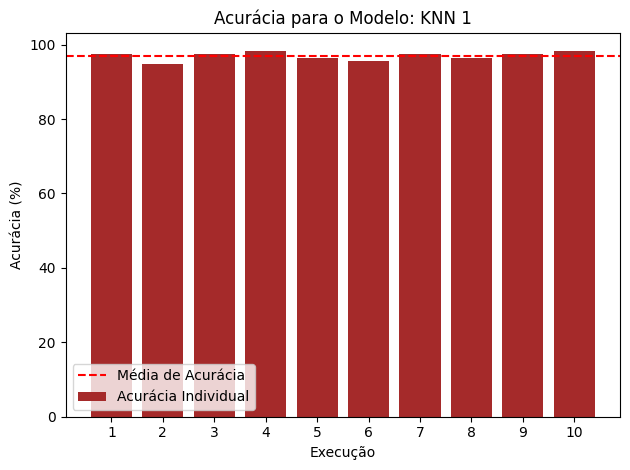

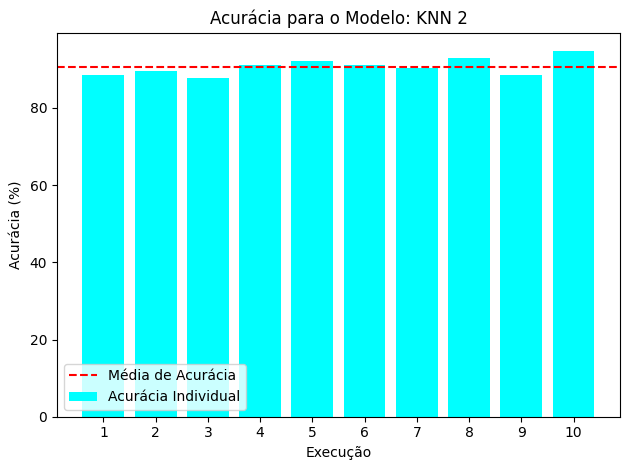

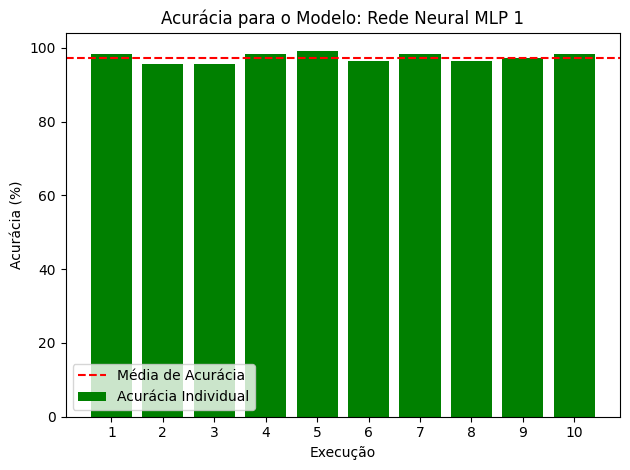

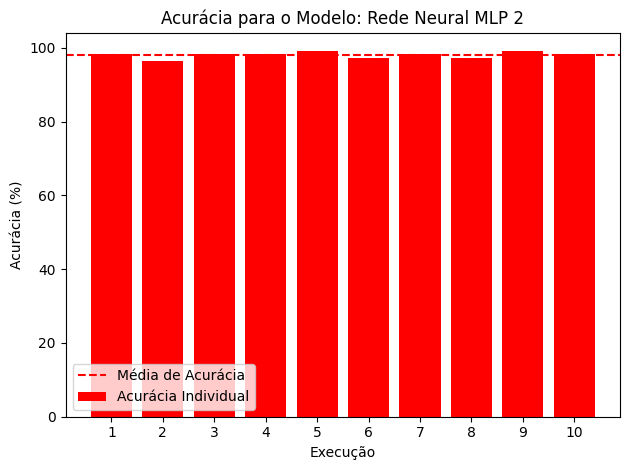

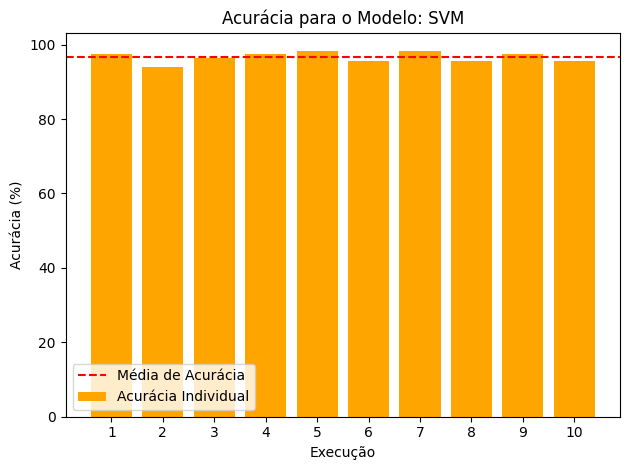

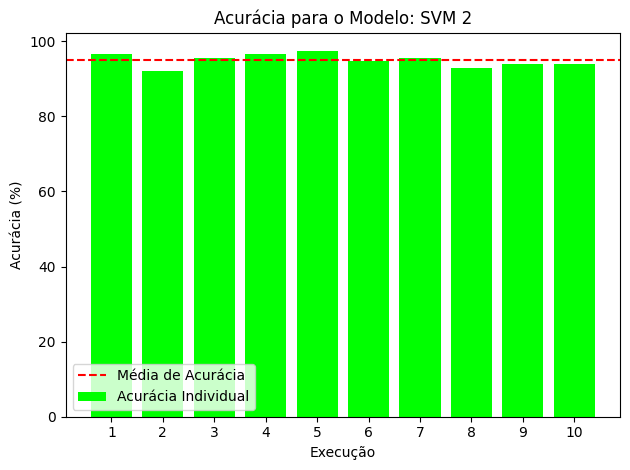

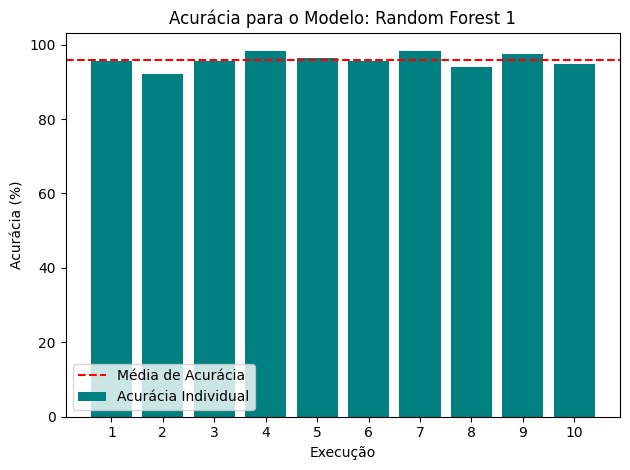

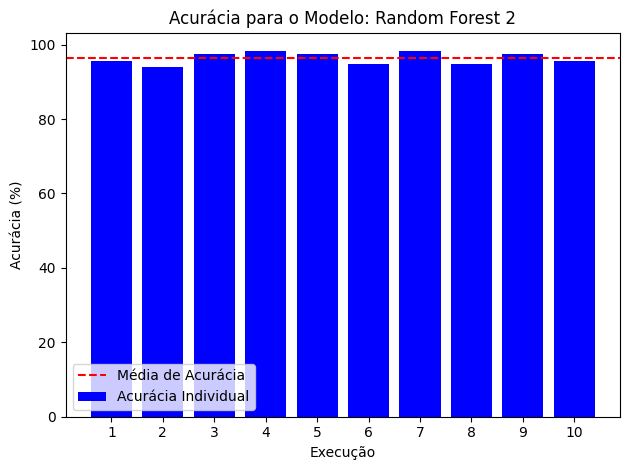

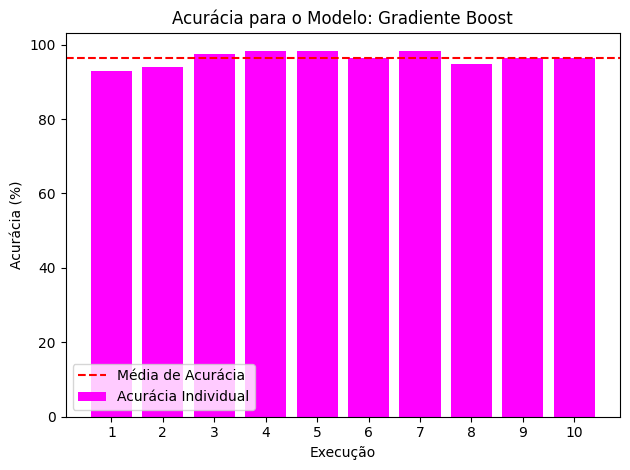

In [23]:
import random as rd
colors = ["red", "blue", "green", "orange", "purple", "pink", "brown", "cyan", "magenta", "yellow", "lime", "teal"]
for name, [model, acc_list] in models.items():
  índice = range(len(acc_list))
  media_acc = sum(acc_list)/len(acc_list)
  plt.bar(índice, acc_list, label='Acurácia Individual', color = rd.choice(colors))
  plt.axhline(y=media_acc, color='r', linestyle='--', label='Média de Acurácia')
  plt.xlabel('Execução')
  plt.ylabel('Acurácia (%)')
  plt.title('Acurácia para o Modelo: ' + name)
  plt.xticks(índice, [str(i + 1) for i in índice])
  plt.legend()
  plt.tight_layout()
  plt.show()


Gráfico com a comparação entre a média de cada modelo executado

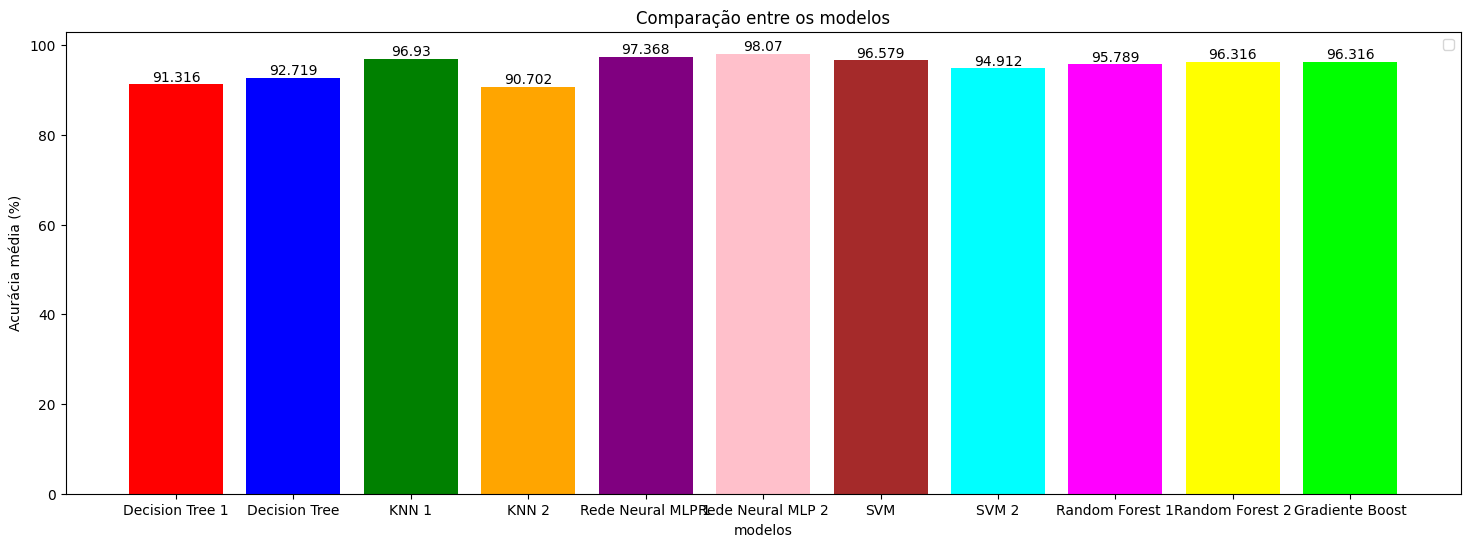

In [24]:
#comparação entre os modelos
names = []
values = []
for item in list_acc_media:
  names.append(item[0])
  values.append(item[1])

colors = ["red", "blue", "green", "orange", "purple", "pink", "brown", "cyan", "magenta", "yellow", "lime", "teal"]

plt.figure(figsize=(18, 6))
plt.bar(names, values, color=colors)
plt.xlabel('modelos')
plt.ylabel('Acurácia média (%)')
plt.title("Comparação entre os modelos")
plt.legend()

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()